# POLI 175 - Lecture 24

## Deep Learning II

# Deep Learning

## Deep Learning

- The next method we are going to cover is deep learning. 

- Deep learning is now at the frontier of Machine Learning knowledge.

- It is one of the most inventive flexible models there is.

- It does a fantastic job of predicting hard-to-see patterns in the data.

## Deep Learning

- We will see two deep learning methods: *Convoluted Neural Networks*, and *Recurrent Neural Networks*.
    + **Convoluted Neural Networks**: Does well with image recognition problems and other problems without recurrent data structures.
    + **Recurrent Neural Networks**: Does well with recurrent structures, such as time-series data (where present values depend on past values, such as GDP, stocks, and others).
    
- The best news computationally is that Google created a library called `TensorFlow`, which does all the estimations for us.

- We will learn how to use an interface to this library called `keras`.

## Deep Learning

- Let us see a very simple *feed-forward* neural network.

![nn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png)

## Deep Learning

- This neural network is, mathematically:

$$ f(X) \ = \ \beta_0 + \sum_k \beta_k h_k(X) $$

- The features we start our NN call the *input layer*.

- The output of our NN is called the *output layer*.

- And the insides we call the *hidden layers*.

## Deep Learning 

- In the case of a single feed-forward structure, we have one hidden layer:

![nn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png)

## Deep Learning 

- Each hidden layer is comprised by activation functions:

$$ A_k \ = \ h_k(X) \ = \ g(w_{k0} + \sum_j g(w_{kj}X_j) $$

- The activation function is based on the weights $w_{kj}$, estimated from the data

- And the $g(.)$ is a non-linear function specified by us.

## Deep Learning

- The main thing here is the shape of the $g()$ function.

- If $g$ is the identity function, we would recover a simple linear regression model.
    + The $g$ should be non-linear!

## Deep Learning

- If you look closely, the name neural networks would then make sense:
    + It seems like a bunch of neurons firing up depending on the activation.
    
- But there is something else going on here:
    + If you look at the activation functions carefully, you will realize they have new features!
    + So, the strength of Deep Learning is that it comes up with new features based on older features.

## Deep Learning

Choices for $g$: 

- *Sigmoid* activation function: 

$$ g(z) \ = \ \dfrac{1}{1 + e^{-z}}$$

- *Rectified linear unit* function:

$$ g(z) \ = \ (z)_+ $$

## Deep Learning

Example of these $g$s here:

![nn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn2.png)

## Deep Learning

- And the reason why it is so good is that you can fit pretty much all functional forms:
    + Example: Can we fit a interaction term ($f(x_1, x_2) = x_1 \cdot x_2$)? Yes!

## Deep Learning

- Let: $X = (X_1. X_2)$, $K = 2$, $g(z) = z^2$. Assume we fit a feed-forward with two hidden layers (hence $K = 2$!) and find:

$$ \beta_0 = 0, \quad \beta_1 = \frac{1}{4}, \quad \beta_2 = -\frac{1}{4} $$

$$ w_{10} = 0, \quad w_{11} = 1, \quad w_{12} = 1 $$

$$ w_{20} = 0, \quad w_{21} = 1, \quad w_{22} = -1 $$

## Deep Learning

The activation functions are:

$$ h_1(X) \ = \ (0 + X_1 + X_2)^2 \ = \ (X_1 + X_2)^2$$

$$ h_2(X) \ = \ (0 + X_1 - X_2)^2 \ = \ (X_1 - X_2)^2$$


## Deep Learning

And the $f$ is:

$$ f(X) \ = \ 0 + \frac{1}{4}h_1(X) - \frac{1}{4}h_2(X) $$

And after some algebra:

$$ f(X)  \ = \ X_1 X_2 $$

- This is awesome! 
    + We started with a straightforward, functional form and reached a complex interaction term structure.
    + And this is the beauty of Deep Learning: it can easily capture the patterns from various functional forms.
    


## Deep Learning

- But most of the time, at the expense of a clear view of what is going on: *low interpretability*

Example: hand-writing classification problem discussed in the book.

![nn3](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn3.png)

In [ ]:
# Some Keras
# To install it in mykernel
# source mykernel/bin/activate
# pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
## Building a simple NN
model = Sequential()

# Input layer with four neurons (four starting features) and six neurons, 'relu' activation
model.add(Dense(6, input_shape=(4,), activation="relu"))

# One output layer
model.add(Dense(1))

# Summarise your model
model.summary()

# Do you think you can you draw it?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


2023-03-10 23:38:11.856405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-10 23:38:11.856459: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-10 23:38:11.856504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-03-10 23:38:11.857089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Deep Learning

<img src="https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/nn1.png" width="400">

In [3]:
## Now write a code that creates this one here

## Deep Learning

- Let us get started by fitting a Neural Networking to predict votes in the Chile Dataset.

In [4]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Some statsmodels to deal with GAMs
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

In [5]:
# Scikit Learn
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error, r2_score, mean_squared_error, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier, BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

In [6]:
## Loading Chile data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


In [7]:
## Loading Chile data
y = chile_clean['vote']
X = chile_clean[['age', 'statusquo']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 12345)

In [8]:
# Initialize the model
model = Sequential()

# Getting the two variables and feeding them into 10 neurons
model.add(Dense(10, input_shape=(2,), activation='relu'))

# Adding 10 extra neurons
model.add(Dense(10, activation='relu'))

# Spitting out the prediction
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 50, verbose = 0)

In [10]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

16/16 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9354
Accuracy: 0.9354207515716553


In [11]:
## Your turn: adapt this code to get all variables

## Deep Learning

- Now, let us predict a multiple outcomes. 

- Remember that the Chile dataset the answers were:
    + Undecided
    + Abstain
    + Yes
    + No
    
- Let us see if we can improve upon the results from the multinomial support vector machine.

In [12]:
## Loading Chile data
chile_clean2 = chile.dropna()
chile_clean2['logincome'] = np.log(chile_clean2['income'])
chile_clean2['logpop'] = np.log(chile_clean2['population'])
dummies = pd.get_dummies(chile_clean2['sex'], prefix = 'sex', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['region'], prefix = 'region', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['education'], prefix = 'education', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
print(chile_clean2.vote.value_counts())

N    867
Y    836
U    551
A    177
Name: vote, dtype: int64


/tmp/ipykernel_190168/1549749199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_clean2['logincome'] = np.log(chile_clean2['income'])
/tmp/ipykernel_190168/1549749199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_clean2['logpop'] = np.log(chile_clean2['population'])


In [13]:
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 22)                264       
                                                                 
 dense_6 (Dense)             (None, 22)                506       
                                                                 
 dense_7 (Dense)             (None, 22)                506       
                                                                 
 dense_8 (Dense)             (None, 22)                506       
                                                                 
 dense_9 (Dense)             (None, 4)                 92        
                                                                 
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
_________________________________________________________________


In [14]:
## A bit of pre-processing in the voting variable
y2 = chile_clean2['vote']
y2 = pd.Categorical(y2)
cats = y2.categories
y2 = y2.codes
y2 = to_categorical(y2)
X2 = chile_clean2[['age', 'logincome', 'statusquo', 'logpop', 'sex_M', 
                  'region_M', 'region_N', 'region_S', 'region_SA', 'education_PS', 'education_S']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 12345)
chile_clean2.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,Y,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,N,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,Y,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,N,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,N,10.463103,12.072541,0,0,1,0,0,0,1


In [15]:
## Fitting 20 epochs
model.fit(X2_train, y2_train, epochs = 20, verbose = 0)
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

23/23 [==============================] - 0s 1ms/step


array([[  0,  33,   9,  24],
       [  0, 220,  15,  14],
       [  0,  57,  44,  76],
       [  0,  17,  20, 201]])

In [16]:
## Are we overfitting? We can save the history and check for that!
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 22)                264       
                                                                 
 dense_11 (Dense)            (None, 22)                506       
                                                                 
 dense_12 (Dense)            (None, 22)                506       
                                                                 
 dense_13 (Dense)            (None, 22)                506       
                                                                 
 dense_14 (Dense)            (None, 4)                 92        
                                                                 
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Are we overfitting? We can save the history and check for that!
h_callback = model.fit(X2_train, y2_train, epochs = 100, validation_data=(X2_test, y2_test), verbose = 0)

# prep to confusion matrix
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

23/23 [==============================] - 0s 2ms/step


array([[  0,  26,  23,  17],
       [  0, 213,  23,  13],
       [  0,  44,  69,  64],
       [  0,  13,  33, 192]])

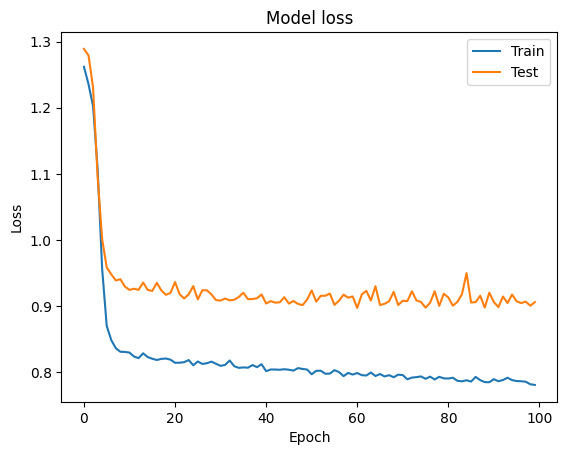

In [18]:
# Plot train vs test loss during training
plt.figure()
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Questions?

# See you next class
